<a href="https://colab.research.google.com/github/ChibuikeOnuba/Covid19-ML-prediction/blob/master/covid_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***COVID 19 ANALYSIS***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

overview of the dataset

# About The Dataset
#### This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

* sex: female or male
* age: of the patient.
* classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
* degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* patient type: hospitalized or not hospitalized.
* pneumonia: whether the patient already have air sacs inflammation or not.
* pregnancy: whether the patient is pregnant or not.
* diabetes: whether the patient has diabetes or not.
* copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
* asthma: whether the patient has asthma or not.
* inmsupr: whether the patient is immunosuppressed or not.
* hypertension: whether the patient has hypertension or not.
* cardiovascular: whether the patient has heart or blood vessels related disease.
* renal chronic: whether the patient has chronic renal disease or not.
* other disease: whether the patient has other disease or not.
* obesity: whether the patient is obese or not.
* tobacco: whether the patient is a tobacco user.
* usmr: Indicates whether the patient treated medical units of the first, second or third level.
* medical unit: type of institution of the National Health System that provided the care.
* intubed: whether the patient was connected to the ventilator.
* icu: Indicates whether the patient had been admitted to an Intensive Care Unit.

## EXPLORATORY DATA ANALYSIS

In [ ]:
covid = pd.read_csv("Covid Data.csv")
print('Shape of dataset: ', covid.shape)
covid.head()

Shape of dataset:  (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [ ]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [ ]:
covid.isna().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

In [ ]:
covid.duplicated().sum()

812049

* Our primary analysis on the datser shows that the dataset contains no missing values and 812,049 duplicated values. 
But recall that the 'about dataset' shows that values 97 and 99 are missing values

A binary column 'DEAD' is created to replace the 'DATE DIED' column. This new column becomes our target column for our ML prediction

In [ ]:
covid['DEAD'] = ['2' if each == '9999-99-99' else '1' for each in covid['DATE_DIED']]
covid.drop(columns='DATE_DIED', axis=1, inplace=True)
covid['DEAD'] = covid['DEAD'].astype('int64')

In [ ]:
corr_table = covid.corr()
corr_table

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEAD
USMER,1.000000,0.127927,-0.001126,-0.190570,0.175457,-0.154950,-0.045088,-0.001469,0.014704,0.011030,...,0.003234,0.014830,-0.015763,0.010097,0.014567,0.011527,0.010638,0.028840,0.174901,0.112671
MEDICAL_UNIT,0.127927,1.000000,0.001475,-0.205413,0.205243,-0.046433,-0.082223,0.005300,0.019523,0.014209,...,0.011785,0.020964,0.027453,0.014406,0.019577,0.014751,0.012282,0.079981,0.205141,0.149030
SEX,-0.001126,0.001475,1.000000,0.089505,-0.089943,-0.012131,0.028367,0.992713,0.008888,0.009372,...,0.007999,0.009257,0.009039,0.008174,0.009858,0.008249,0.004919,-0.057782,-0.089844,-0.081383
PATIENT_TYPE,-0.190570,-0.205413,0.089505,1.000000,-0.976335,0.022966,0.315193,0.088340,0.008743,0.019548,...,0.024924,0.006852,0.036724,0.022175,0.019650,0.018873,0.022123,-0.183370,-0.975810,-0.515582
INTUBED,0.175457,0.205243,-0.089943,-0.976335,1.000000,0.079743,-0.317945,-0.088097,-0.009215,-0.020124,...,-0.024140,-0.007628,-0.035404,-0.022442,-0.020217,-0.019309,-0.022428,0.193075,0.999434,0.509464
PNEUMONIA,-0.154950,-0.046433,-0.012131,0.022966,0.079743,1.000000,-0.073127,-0.007284,-0.004484,-0.005618,...,-0.000802,-0.004799,0.001612,-0.004758,-0.004276,-0.005287,-0.004325,0.075351,0.079691,0.026511
AGE,-0.045088,-0.082223,0.028367,0.315193,-0.317945,-0.073127,1.000000,0.027257,0.004422,0.019048,...,0.022820,-0.004964,0.022837,0.019489,0.015500,0.020124,0.021263,-0.152637,-0.317813,-0.320801
PREGNANT,-0.001469,0.005300,0.992713,0.088340,-0.088097,-0.007284,0.027257,1.000000,0.014707,0.015736,...,0.014265,0.015335,0.014175,0.014378,0.015895,0.014392,0.010794,-0.057809,-0.087991,-0.079864
DIABETES,0.014704,0.019523,0.008888,0.008743,-0.009215,-0.004484,0.004422,0.014707,1.000000,0.828823,...,0.781108,0.835018,0.634611,0.809417,0.752739,0.812657,0.771763,-0.004739,-0.009223,-0.018588
COPD,0.011030,0.014209,0.009372,0.019548,-0.020124,-0.005618,0.019048,0.015736,0.828823,1.000000,...,0.852273,0.855249,0.687323,0.880097,0.814868,0.884032,0.836097,-0.010336,-0.020146,-0.031488


### NUMBER OF UNIQUE VALUES BY COLUMNS

In [ ]:
for i in covid.columns:
    print(i,'-', len(covid[i].unique()))  

USMER - 2
MEDICAL_UNIT - 13
SEX - 2
PATIENT_TYPE - 2
INTUBED - 4
PNEUMONIA - 3
AGE - 121
PREGNANT - 4
DIABETES - 3
COPD - 3
ASTHMA - 3
INMSUPR - 3
HIPERTENSION - 3
OTHER_DISEASE - 3
CARDIOVASCULAR - 3
OBESITY - 3
RENAL_CHRONIC - 3
TOBACCO - 3
CLASIFFICATION_FINAL - 7
ICU - 4
DEAD - 2


For easier comprehension, the columns are selected and replaced with 'Yes' for 1 and 'No' for 2 (asper the description)

In [ ]:
col_vals = ['PATIENT_TYPE', 'INTUBED', 'PNEUMONIA', 'PREGNANT', 'DIABETES', 'COPD', 
            'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 
            'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'ICU', 'DEAD']

for i in col_vals:
    covid[i] = covid[i].replace(1, 'Yes').replace(2, 'No')

* some columns are still having 3 or more unique values(Yes, No, 97, 99). 

Here, a plot is created to visualize the amount of unique values in the columns

In [ ]:
def view(cols):
    sns.countplot(covid[cols])

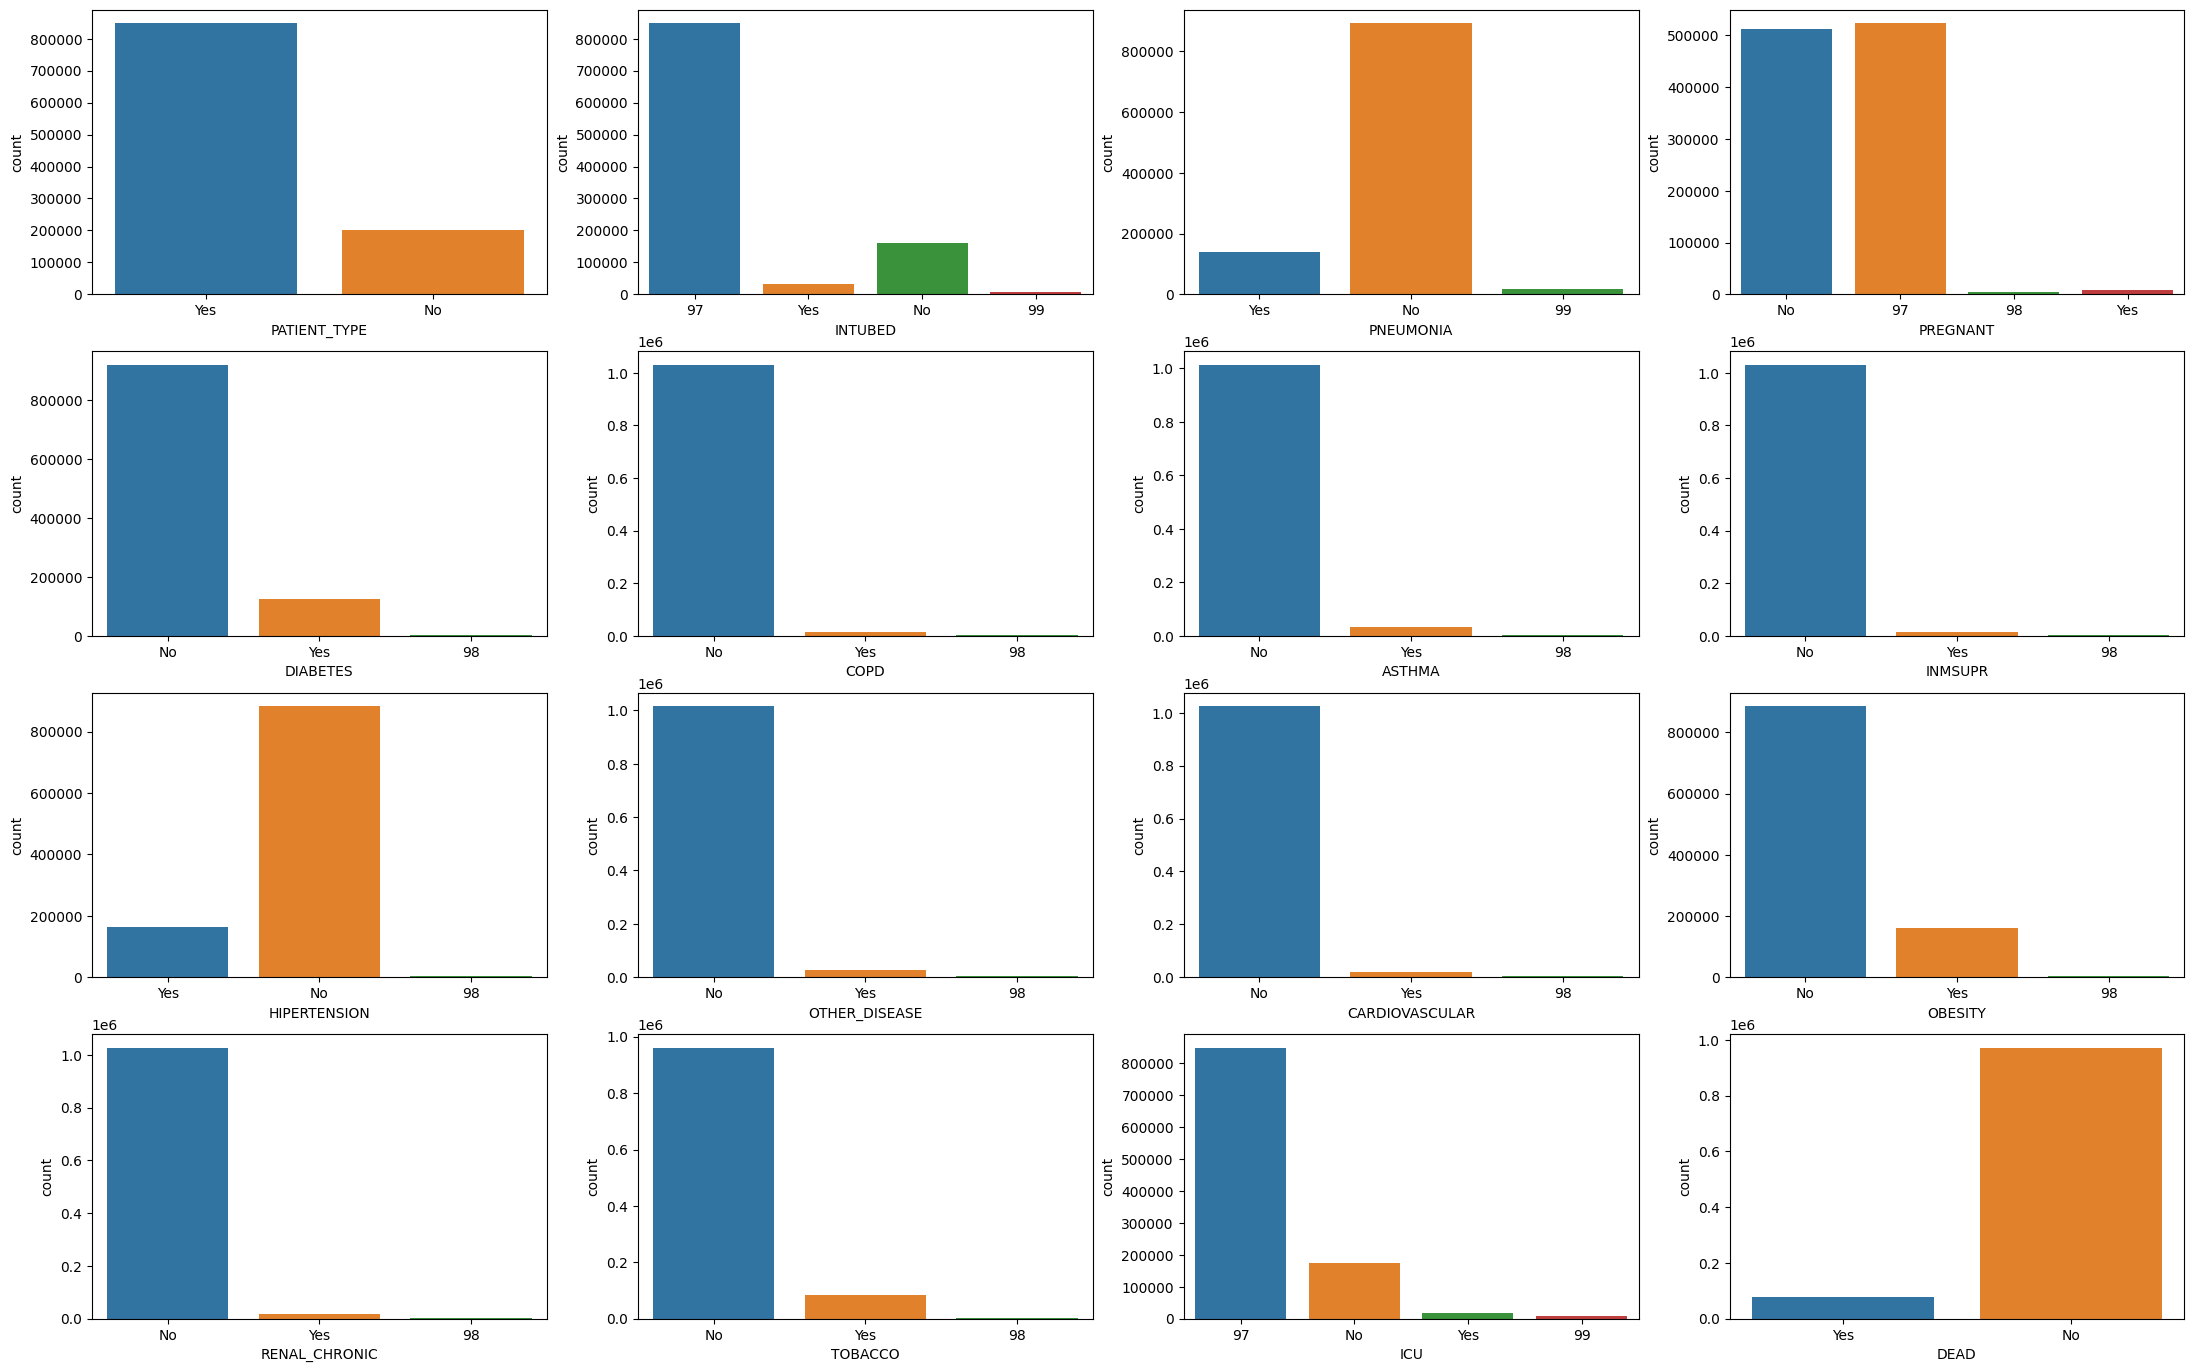

In [ ]:
i=0
plt.figure(figsize=(27, 17), dpi=100)
for col in col_vals:
    
    plt.subplot(4, 4, i+1)
    
    view(col)
    i=i+1

plt.show()
    

Notice that the ICU and INTUBED columns have very high number of null values (view below)

Text(0.5, 1.0, 'INTUBED BY UNIQUE VALUES')

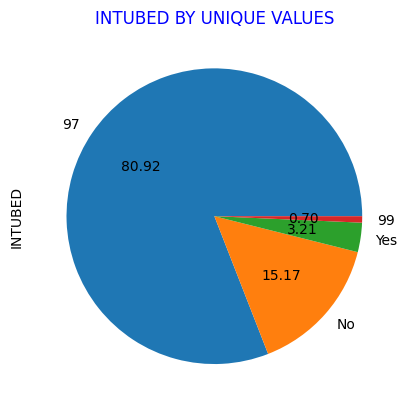

In [ ]:
covid['INTUBED'].value_counts().plot(kind='pie', autopct='%.2f')
plt.title('INTUBED BY UNIQUE VALUES', color='blue')

Text(0.5, 1.0, 'ICU BY UNIQUE VALUES')

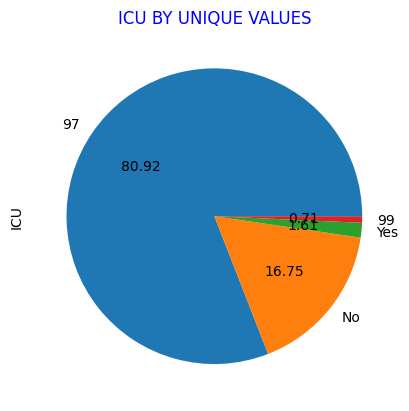

In [ ]:
covid['ICU'].value_counts().plot(kind='pie', autopct = '%.2f')
plt.title('ICU BY UNIQUE VALUES', color='blue')

* 80% of the column values are missing value.

It will be inappropriate to fill the missing values because it will create decrease the integrity of the dataset greatly.
Hence the entire columns are dropped

In [ ]:
covid.drop(columns=['ICU', 'INTUBED'], inplace=True)

Also observe that the sex column wasn not specified (male or female), but this is can figured out.

The visualization below shows that there is a relationship between the 'PREGNANT' and the 'SEX' columns

Text(0.5, 1.0, 'count of Pregnancy by sex')

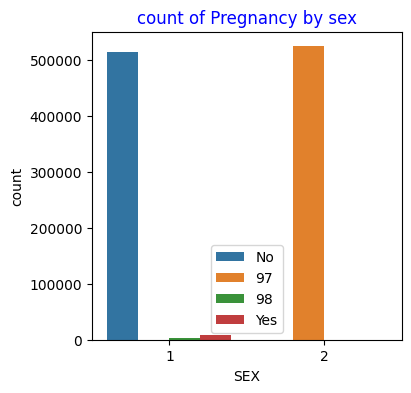

In [ ]:
plt.figure(figsize=(4, 4))
sns.countplot(covid['SEX'], hue=covid['PREGNANT'])
plt.legend(loc='best')
plt.title('count of Pregnancy by sex', color='blue')

From the image, we can see that all the null value(97) falls under sex-2. And since males do not give birth, their values in the 'pregnant' column will be null, hence sex 2 is the male sex

In [ ]:
covid['SEX'] = covid['SEX'].replace(1, 'Female').replace(2, 'Male')
covid['PREGNANT'].replace(97, 'No', inplace=True)

In [ ]:
for i in covid.columns:
    print(i,'-', len(covid[i].unique()))
    

USMER - 2
MEDICAL_UNIT - 13
SEX - 2
PATIENT_TYPE - 2
PNEUMONIA - 3
AGE - 121
PREGNANT - 3
DIABETES - 3
COPD - 3
ASTHMA - 3
INMSUPR - 3
HIPERTENSION - 3
OTHER_DISEASE - 3
CARDIOVASCULAR - 3
OBESITY - 3
RENAL_CHRONIC - 3
TOBACCO - 3
CLASIFFICATION_FINAL - 7
DEAD - 2


Next we drop the empty values for selected columns

In [ ]:
cols = ['PNEUMONIA','PREGNANT', 'DIABETES', 'COPD', 
        'ASTHMA', 'INMSUPR', 'HIPERTENSION','OTHER_DISEASE', 
        'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC','TOBACCO']
for col in cols:
    covid = covid[(covid[col]=='Yes') | (covid[col]=='No')]

In [ ]:
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEAD
0,2,1,Female,Yes,Yes,65,No,No,No,No,No,Yes,No,No,No,No,No,3,Yes
1,2,1,Male,Yes,Yes,72,No,No,No,No,No,Yes,No,No,Yes,Yes,No,5,Yes
2,2,1,Male,No,No,55,No,Yes,No,No,No,No,No,No,No,No,No,3,Yes
3,2,1,Female,Yes,No,53,No,No,No,No,No,No,No,No,No,No,No,7,Yes
4,2,1,Male,Yes,No,68,No,Yes,No,No,No,Yes,No,No,No,No,No,3,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,Male,Yes,No,40,No,No,No,No,No,No,No,No,No,No,No,7,No
1048571,1,13,Male,No,No,51,No,No,No,No,No,Yes,No,No,No,No,No,7,No
1048572,2,13,Male,Yes,No,55,No,No,No,No,No,No,No,No,No,No,No,7,No
1048573,2,13,Male,Yes,No,28,No,No,No,No,No,No,No,No,No,No,No,7,No


## VISUALISATION

 The visualization comprises the univariate analysis and bivariate analysis

### UNIVARIATE ANALYSIS

Text(0.5, 1.0, 'Age Count')

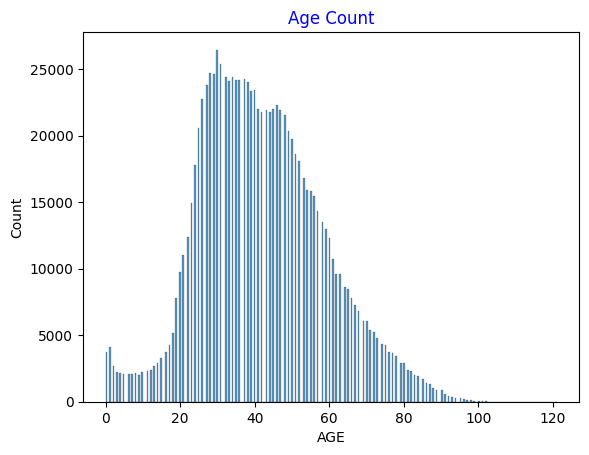

In [ ]:
sns.histplot(covid['AGE'])
plt.title('Age Count', color='blue')

* The distribution shows that most patients fall between the ages of 20 and 60

[Text(0, 0, '510041'), Text(0, 0, '511936')]

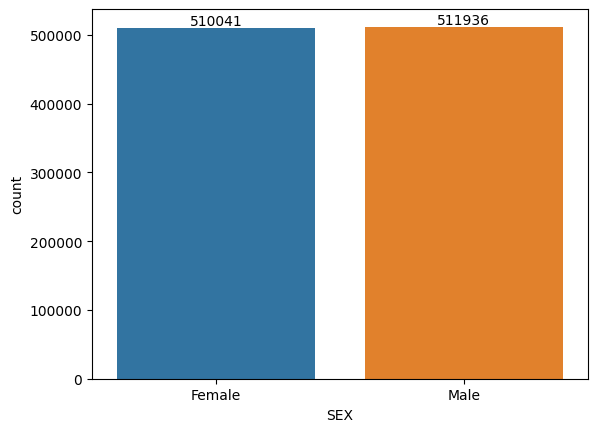

In [ ]:
ax = sns.countplot(covid['SEX'])
plt.bar_label(ax.containers[0])

* Gender is not a factor to consider whether a person can contract the virus or not

[Text(0, 0, '48087'), Text(0, 0, '463849')]

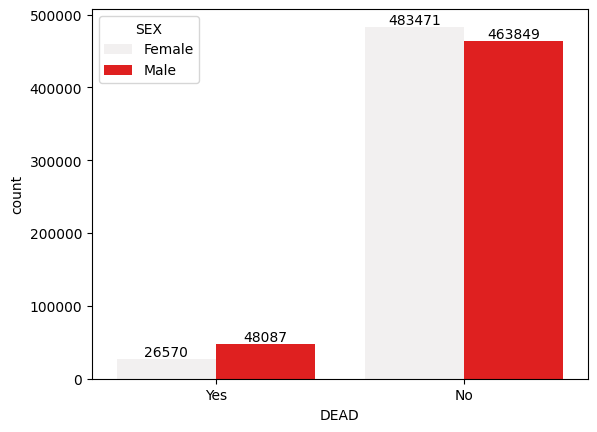

In [ ]:
ax = sns.countplot(covid['DEAD'], hue=covid['SEX'], color='red')
plt.bar_label(ax.containers[0])
plt.bar_label(ax.containers[1])

* More males died from covid19 than females

[Text(0, 0, '865383'), Text(0, 0, '156594')]

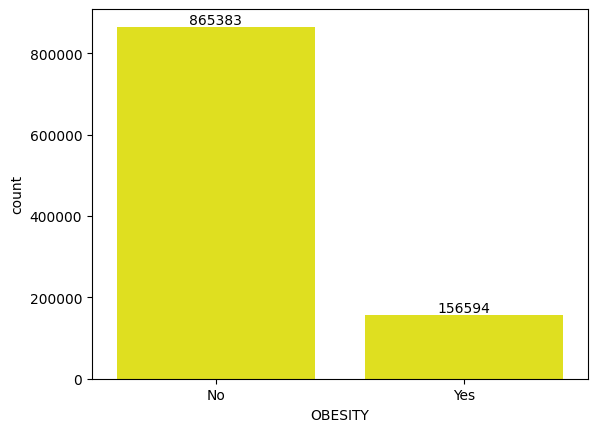

In [ ]:
ax = sns.countplot(covid['OBESITY'], color='yellow')
plt.bar_label(ax.containers[0])

### BIVARIATE ANALYSIS

Text(0.5, 1.0, 'AGE AGAINST DEAD')

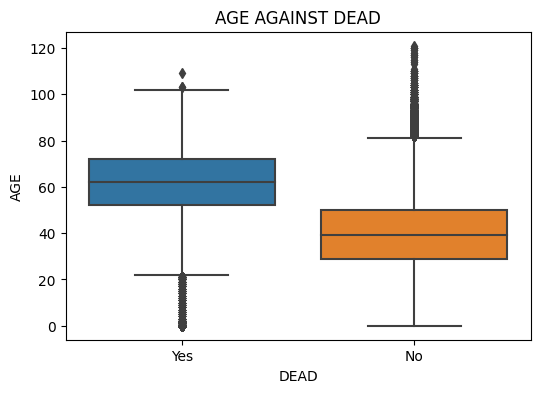

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(covid['DEAD'], covid['AGE'])
plt.title('AGE AGAINST DEAD')

* Older patients are more likely to die of COVID19 than younger patients

<AxesSubplot:xlabel='SEX', ylabel='AGE'>

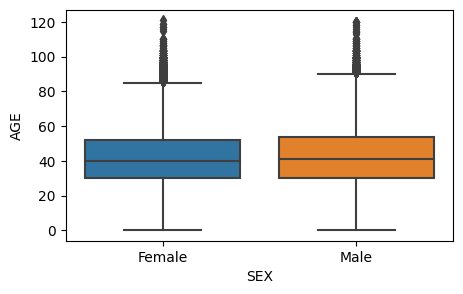

In [ ]:
plt.figure(figsize=(5,3))
sns.boxplot(covid['SEX'], covid['AGE'])

* There is no much difference among sexes in terms of average age of patients

Text(0.5, 1.0, 'Average age distribution of Death by Sex')

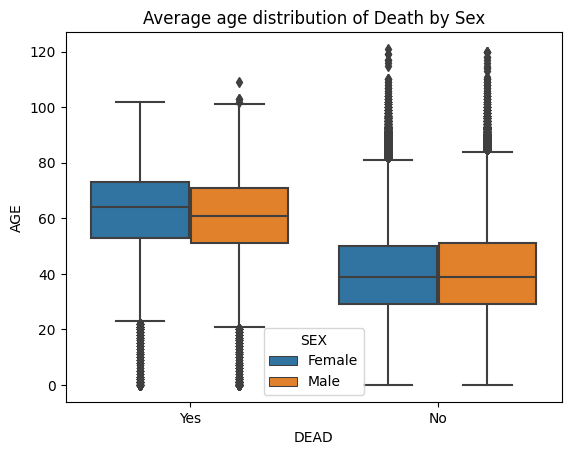

In [ ]:
sns.boxplot(covid['DEAD'], covid['AGE'], hue=covid['SEX'])
plt.title('Average age distribution of Death by Sex')

Text(0.5, 1.0, 'COUNT OF CARDIOVASCULAR PATIENTS')

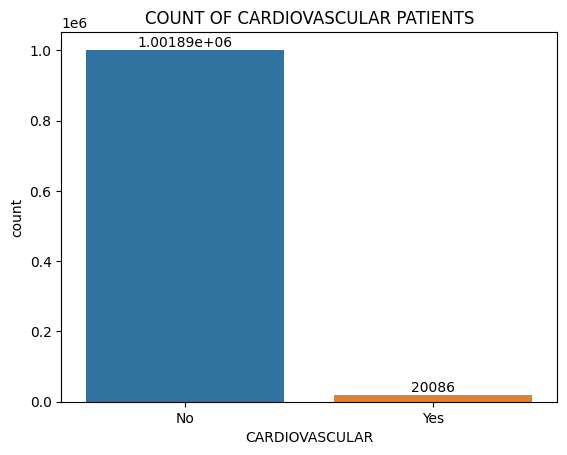

In [ ]:
ax = sns.countplot(data=covid, x='CARDIOVASCULAR')
plt.bar_label(ax.containers[0])
plt.title('COUNT OF CARDIOVASCULAR PATIENTS')

* Only very few of the patients have cardiovascular diseases

## FEATURE ENGINEERING

#### FEATURE SELECTION

##### ENCODING THE BINARY CATEGORICAL COLUMNS

In [ ]:
cat_cols = ['SEX', 'PATIENT_TYPE', 'PNEUMONIA',
       'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION',
       'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC',
       'TOBACCO', 'DEAD']

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
Label_encode = LabelEncoder()
hotencode = OneHotEncoder()

In [ ]:
for i in cat_cols:
    covid[i] = Label_encode.fit_transform(covid[i])

covid = covid.reset_index()

Text(0.5, 1.0, 'CORRELATION HEATMAP')

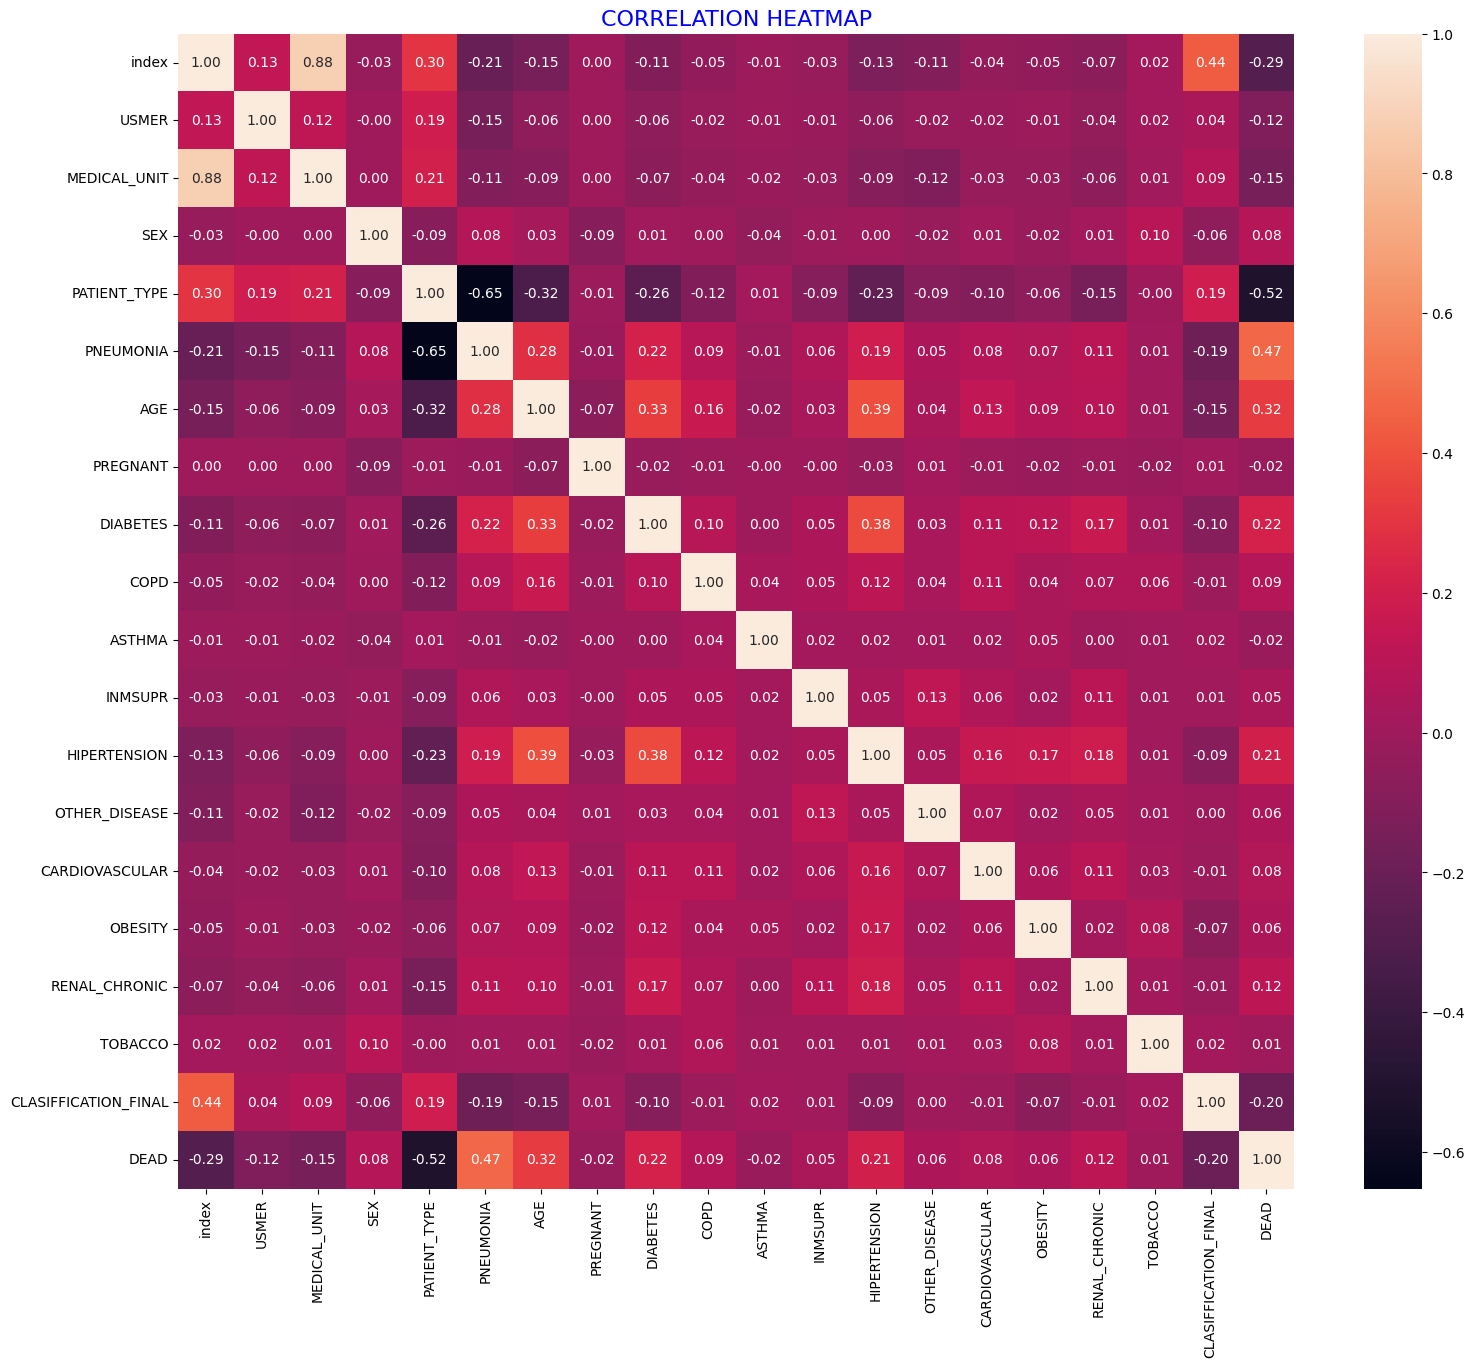

In [ ]:
plt.figure(figsize=(18, 15))
sns.heatmap(covid.corr(), annot=True, fmt='.2f')
plt.title('CORRELATION HEATMAP', fontsize=16, color='blue')

There are too many columns in the dataset (19). Working with too many features for prediction can reduce the accuracy of the model. Hence columns with little or no correlation with the target columns will be dropped

columns with correlation between -0.08 and 0.08 are selected then dropped

In [ ]:
unrelevant_columns = covid.corr()[(covid.corr()['DEAD'] <= 0.09) & (covid.corr()['DEAD'] >= -0.09)].index

In [ ]:
covid = covid.drop(columns=unrelevant_columns).drop('index', axis=1)

##### SCALING THE NUMERIC FEATURE

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
covid['AGE'] = scaler.fit_transform(covid['AGE'].values.reshape(-1, 1))

# MODELLING

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = covid.drop('DEAD', axis=1)
y = covid['DEAD']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
print('x_train: ', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

x_train:  (817581, 9)
x_test:  (204396, 9)
y_train:  (817581,)
y_test:  (204396,)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report

#### LOGISTIC REGRESSION

In [ ]:
lreg = LogisticRegression()
lreg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
predictions = lreg.predict(x_test)
accuracy = round(accuracy_score(y_test, predictions), 2)*100
f1 = round(f1_score(y_test, predictions), 2)*100
print('Accuracy_score: {}'.format(accuracy))
print('F1_score: {}'.format(f1))


Accuracy_score: 94.0
F1_score: 50.0


We observe that the model yielded a very high accuracy score but this not reliable nor efficient in this case. 

Since our model is expected to correctly predict both the No and Yes values, the accurate metric to evaluate this is the 'F1_Score'.

But the result of the f1_score is low hence it is not reliable when used on unseen data..
One of the major causes of a low f1_score is an Imbalanced Dataset

# IMBALANCED DATASET

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations

Text(0.5, 1.0, 'Count of unique values (DEAD column)')

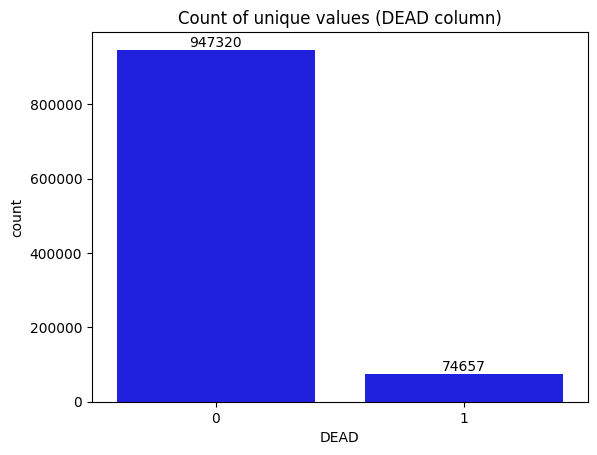

In [ ]:
ax = sns.countplot(covid['DEAD'], color='blue')
plt.bar_label(ax.containers[0])
plt.title('Count of unique values (DEAD column)')

The Dataset is an Imbalanced dataset because the target column is unevenly distributed as seen above

Handling imbalanced dataset
There are various ways of handling an imbalanced dataset which include
* SMOTE (Synthetic Minority Oversampling Technique)
* Threshold moving
* Resampling (Oversampling and Undersampling)
* BalancedBaggingClassifier


The SMOTE technique will be used in this exercise to over sample the minority class

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:

# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(x, y)
sampled_covid = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

<AxesSubplot:xlabel='DEAD', ylabel='count'>

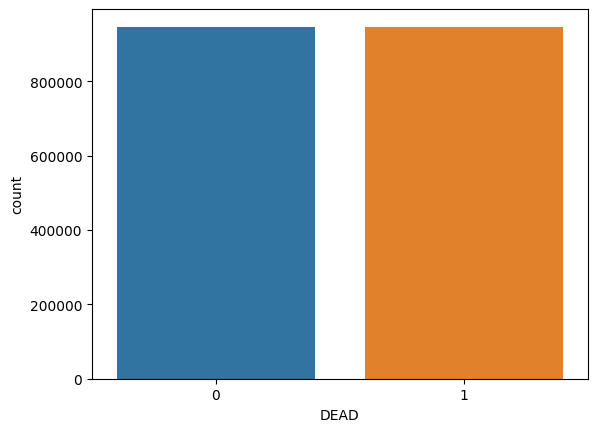

In [ ]:
sns.countplot(sampled_covid['DEAD'])

The target column is now evenly distributed

#### OPTIMZED MODELLING

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(oversampled_X, oversampled_Y, random_state=42, test_size=0.2)

In [ ]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
accuracy = round(accuracy_score(y_test, y_pred), 2)*100

print('Accuracy Score: ', accuracy)

Accuracy Score:  91.0


In [ ]:
f1 = round(f1_score(y_test, y_pred), 2)*100
print('F1_Score: ', f1)

F1_Score:  91.0


PLOTTING CONFUSION MATRIX AND CLASSIFICATION REPORT

Text(0.5, 1.0, 'REGRESSION CONFUSION MATRIX')

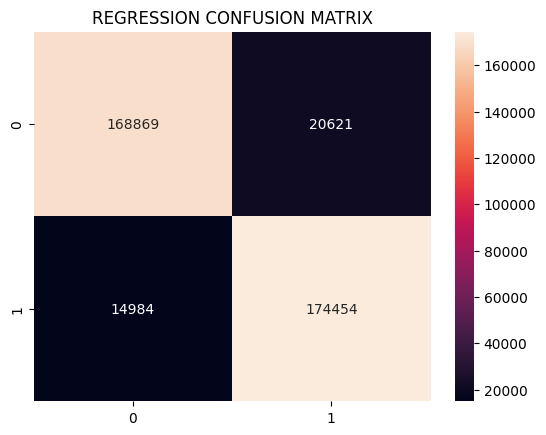

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f')
plt.title('REGRESSION CONFUSION MATRIX')

In [ ]:
report = classification_report(y_test, y_pred)



```
precision    recall  f1-score   support

0    0.92      0.89      0.90    189490
1    0.89      0.92      0.91    189438

accuracy                               0.91    378928
macro avg          0.91      0.91      0.91    378928
weighted avg       0.91      0.91      0.91    378928

```

### **PLOTTING ROC CURVE**

In [ ]:
from sklearn.metrics import roc_curve

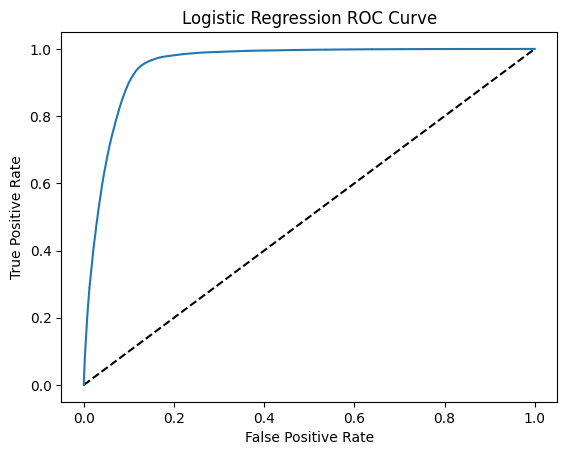

In [ ]:

# Probabilities
logreg_pred_proba = logreg.predict_proba(x_test)

fpr, tpr, thresholds = roc_curve(y_test, logreg_pred_proba[:,1])
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

# Conclusion
* In this project i predicted "Dead" situation with 91% accuracy.
* I just used one algorithm Logistic Regression.
* AN important point in this project was handling the imbalance dataset problem. I solved this usig the  it out with SMOTE technique.
